### Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Extracting Dataset from zip file

In [2]:
!cp /content/drive/MyDrive/Dataset.zip /content

In [3]:
%%capture
!unzip /content/Dataset.zip -d data

### Importing Libraries

In [10]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import random
import os

### Dataset initializing

In [11]:
# Defining dataset paths after unzip
train_dir = '/content/data/Dataset/training_set'
test_dir = '/content/data/Dataset/test_set'



### train and test dataset preparation for model

In [13]:
# ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ImageDataGenerator for test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Display sample images from dataset both classes

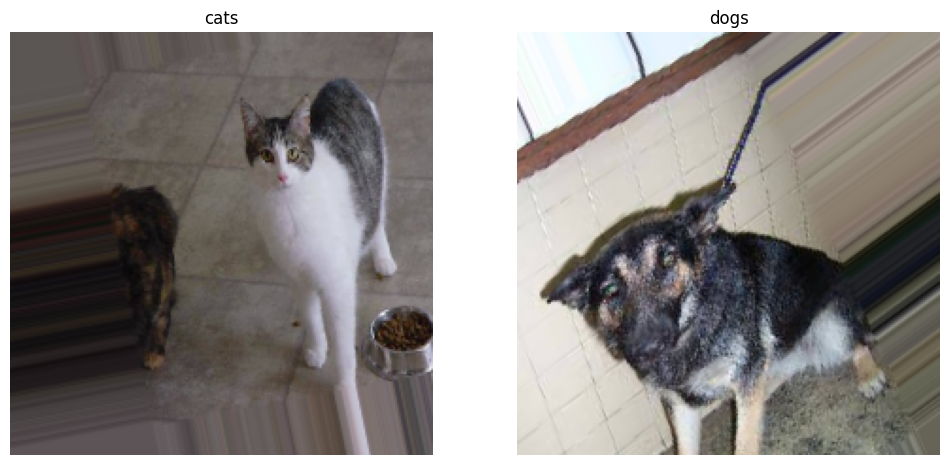

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display sample images from each class
def show_sample_images():
    # Getting class names from the generator
    class_names = list(train_generator.class_indices.keys())

    # Getting a batch of images and labels from the train generator
    images, labels = next(train_generator)

    # Creating a figure to display the images
    plt.figure(figsize=(12, 6))

    # Iterate through each class
    for i, class_name in enumerate(class_names):
        # Find indices for each class in the batch
        class_index = train_generator.class_indices[class_name]
        class_indices = np.where(labels == class_index)[0]

        if len(class_indices) > 0:
            # Display the first image found for this class
            plt.subplot(1, len(class_names), i + 1)
            plt.imshow(images[class_indices[0]])
            plt.title(class_name)
            plt.axis('off')

    plt.show()

# function calling for sample images display
show_sample_images()


### Model Building

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,263,809 (73.49 MB)

 Trainable params: 19,263,809 (73.49 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [17]:
history = model.fit(
    train_generator,
    #steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    #validation_steps=test_generator.samples // test_generator.batch_size,
    #callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 127s 453ms/step - accuracy: 0.5004 - loss: 0.7170 - val_accuracy: 0.5695 - val_loss: 0.6925
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 127s 428ms/step - accuracy: 0.5128 - loss: 0.6927 - val_accuracy: 0.5596 - val_loss: 0.6909
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 146s 440ms/step - accuracy: 0.5253 - loss: 0.6905 - val_accuracy: 0.5022 - val_loss: 0.7091
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 118s 461ms/step - accuracy: 0.6037 - loss: 0.6636 - val_accuracy: 0.5269 - val_loss: 0.7354
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 114s 445ms/step - accuracy: 0.6334 - loss: 0.6294 - val_accuracy: 0.5783 - val_loss: 0.6702
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 110s 428ms/step - accuracy: 0.6684 - loss: 0.6030 - val_accuracy: 0.6036 - val_loss: 0.6457
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 111s 426ms/step - accuracy: 0.6836 - loss: 0.5949 - val_accuracy: 0.6288 - val_loss: 0.6352
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 115s 449ms/step - accuracy: 0.6783 - loss: 0.59

### Model Testing on test dataset

In [18]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8460 - loss: 0.3470
Test accuracy: 0.8402777910232544


### Ploting history graph for training and validation accuracy and loss

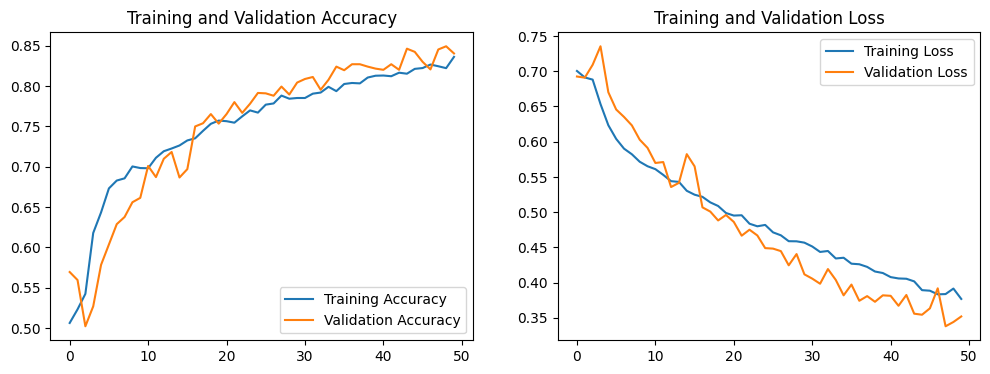

In [20]:
# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [28]:
# saving trained model in directory for further use for prediction
model.save('/content/data/Dataset/my_model1.h5')  # Save the entire model as an HDF5 file


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


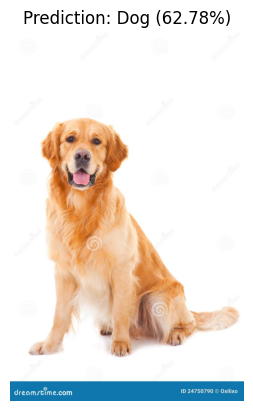

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Prepare the test Image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

#  Predicting the Class
def predict_image(img_path, model, target_size=(224, 224)):
    img_array = load_and_preprocess_image(img_path, target_size)
    prediction = model.predict(img_array)
    prediction_percentage = prediction[0][0] * 100  # Get the prediction percentage
    predicted_class = 'Dog' if prediction_percentage > 50 else 'Cat'  # Assume >50% is Dog, <=50% is Cat
    return predicted_class, prediction_percentage

# Showing Prediction
def show_prediction(img_path, model):
    predicted_class, prediction_percentage = predict_image(img_path, model)

    # Load the image for display
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({prediction_percentage:.2f}%)")
    plt.axis('off')
    plt.show()

# # Path to the single image you want to predict
image_path = '/content/dog.jpg'
show_prediction(image_path, model)


In [ ]:
pip install pydot graphviz


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


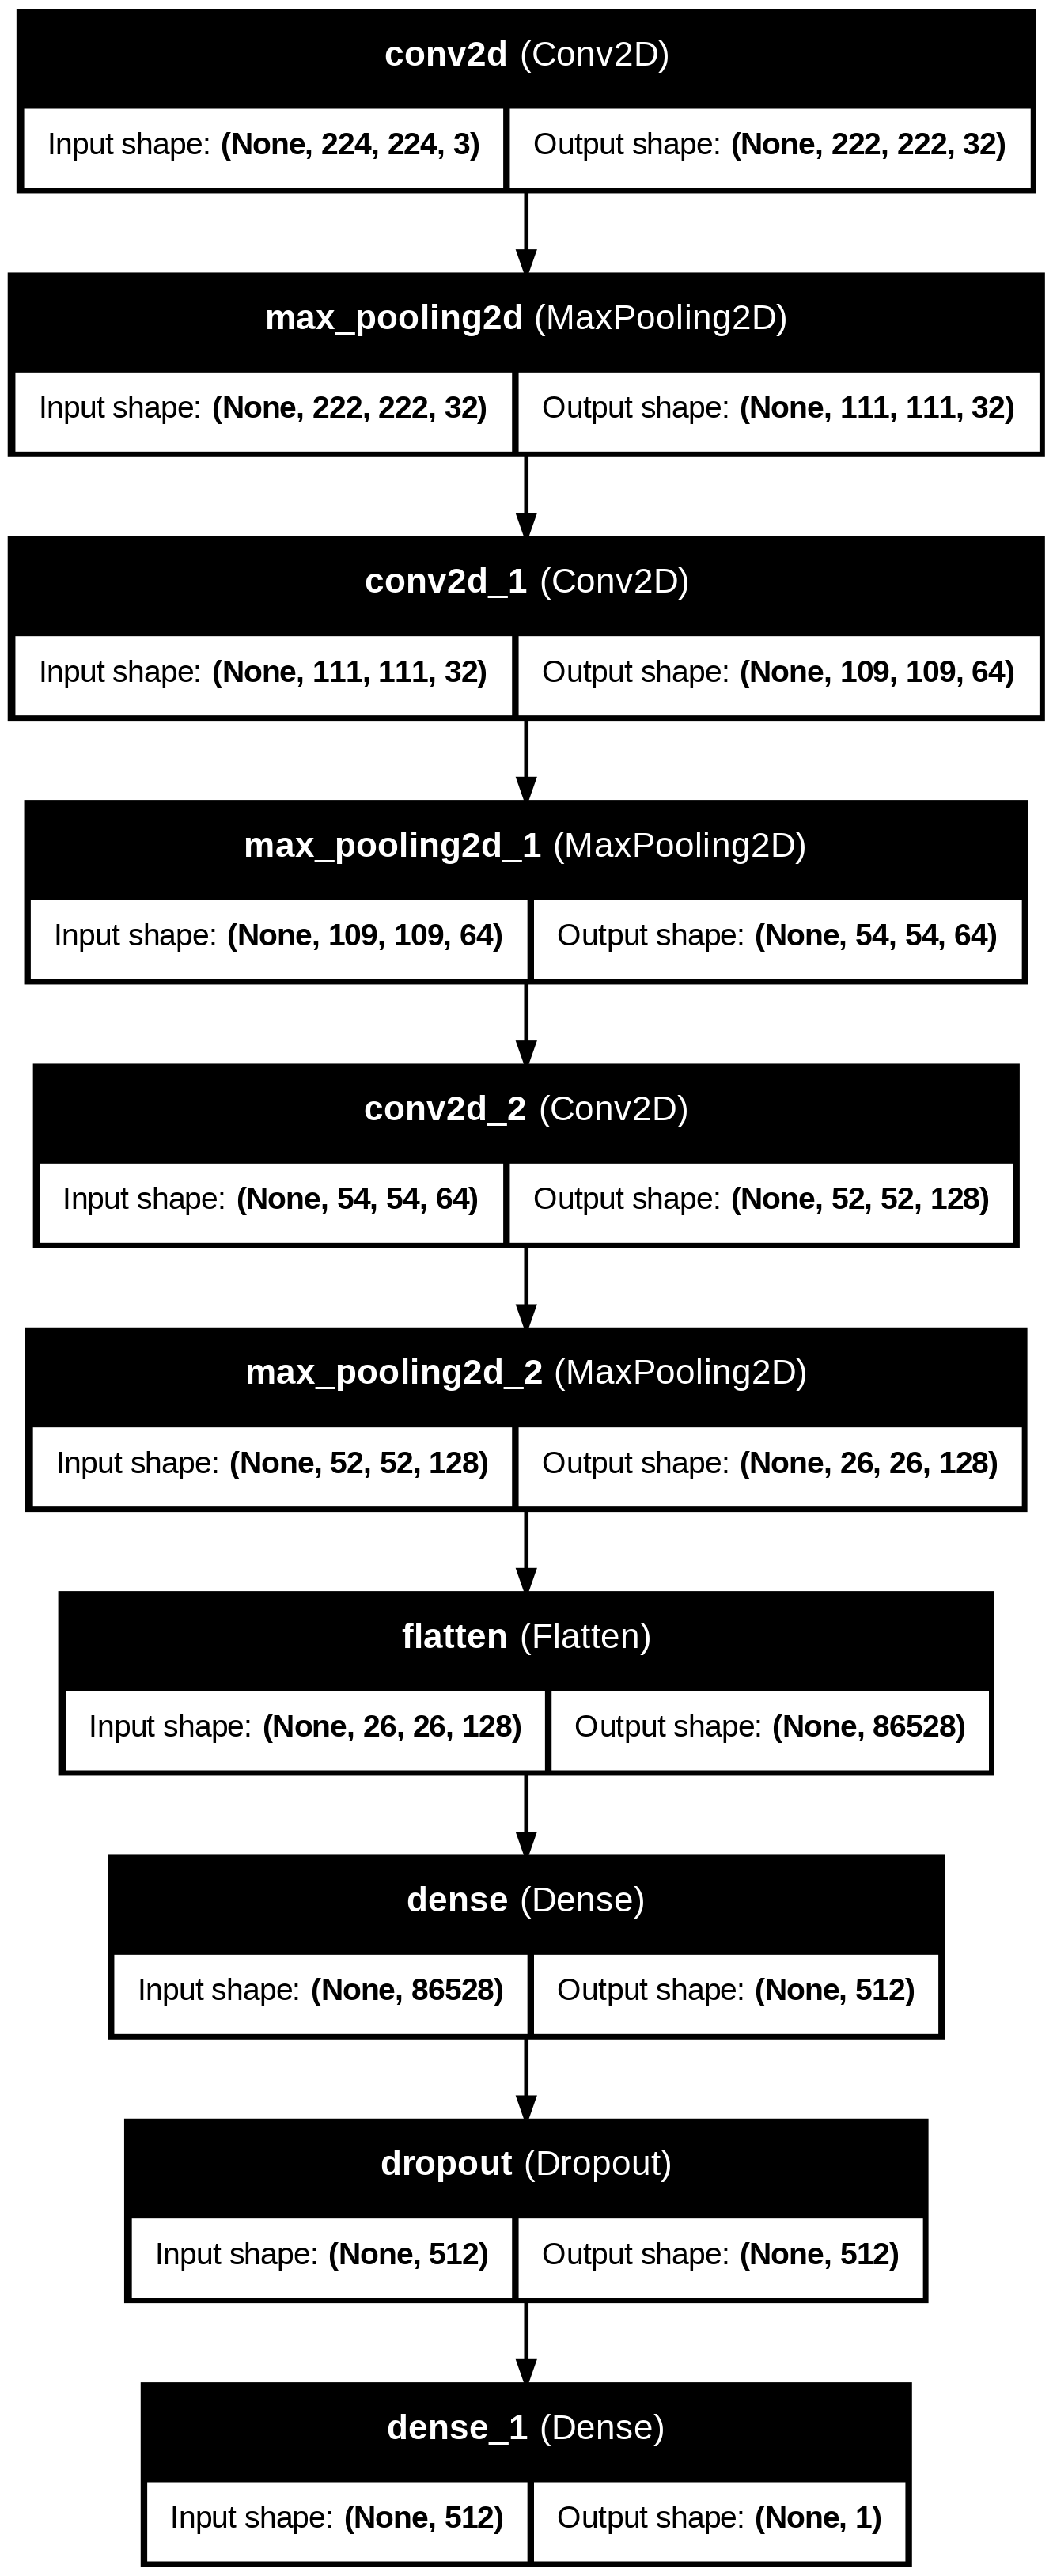

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Define your model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Generate and save the model diagram
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


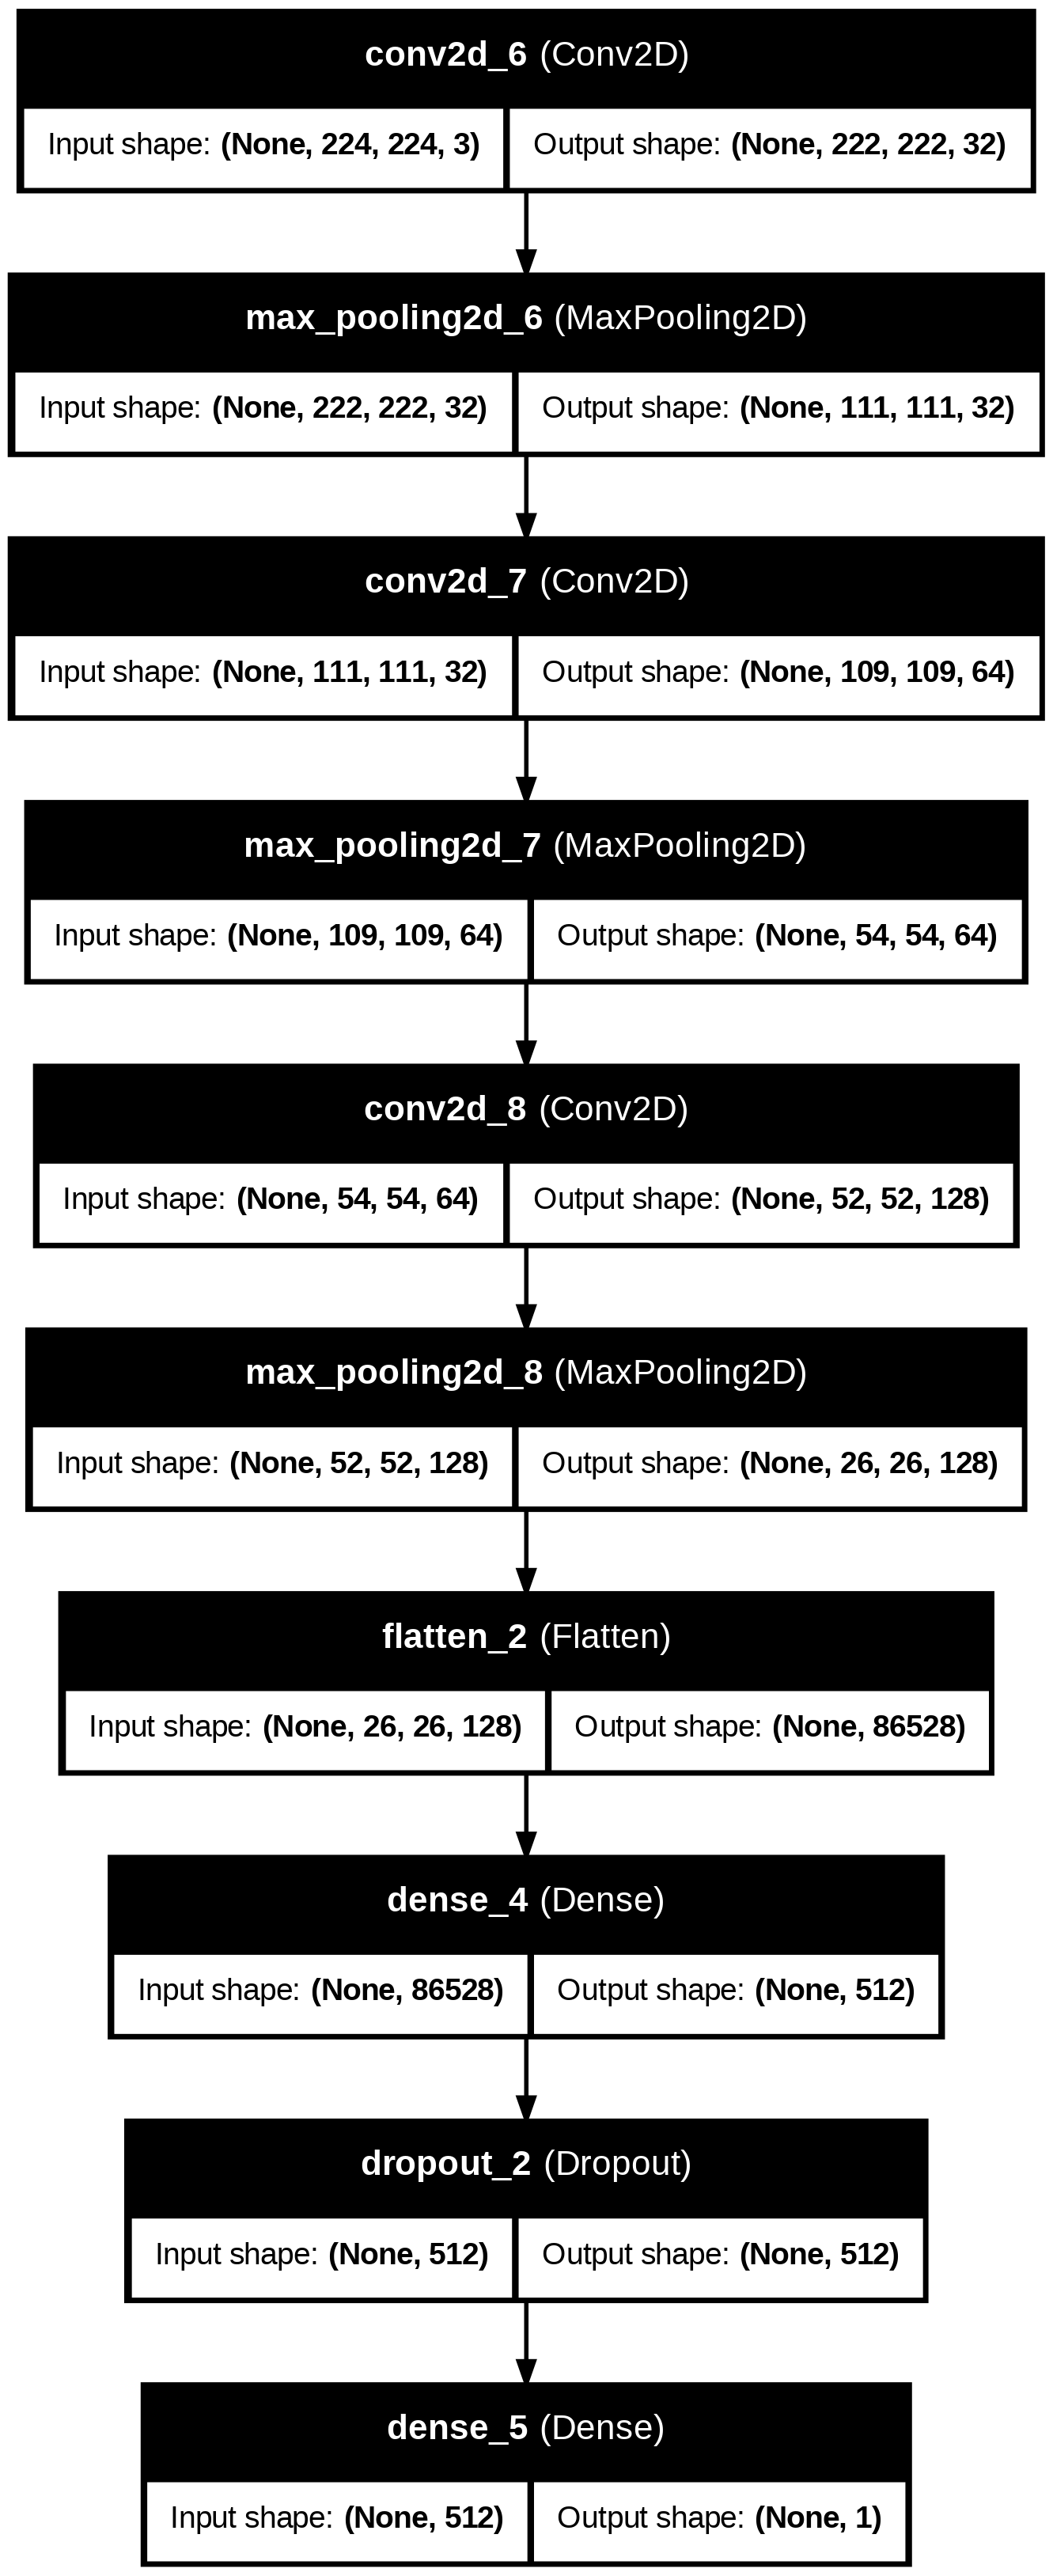

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Generate and save the model architecture diagram
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


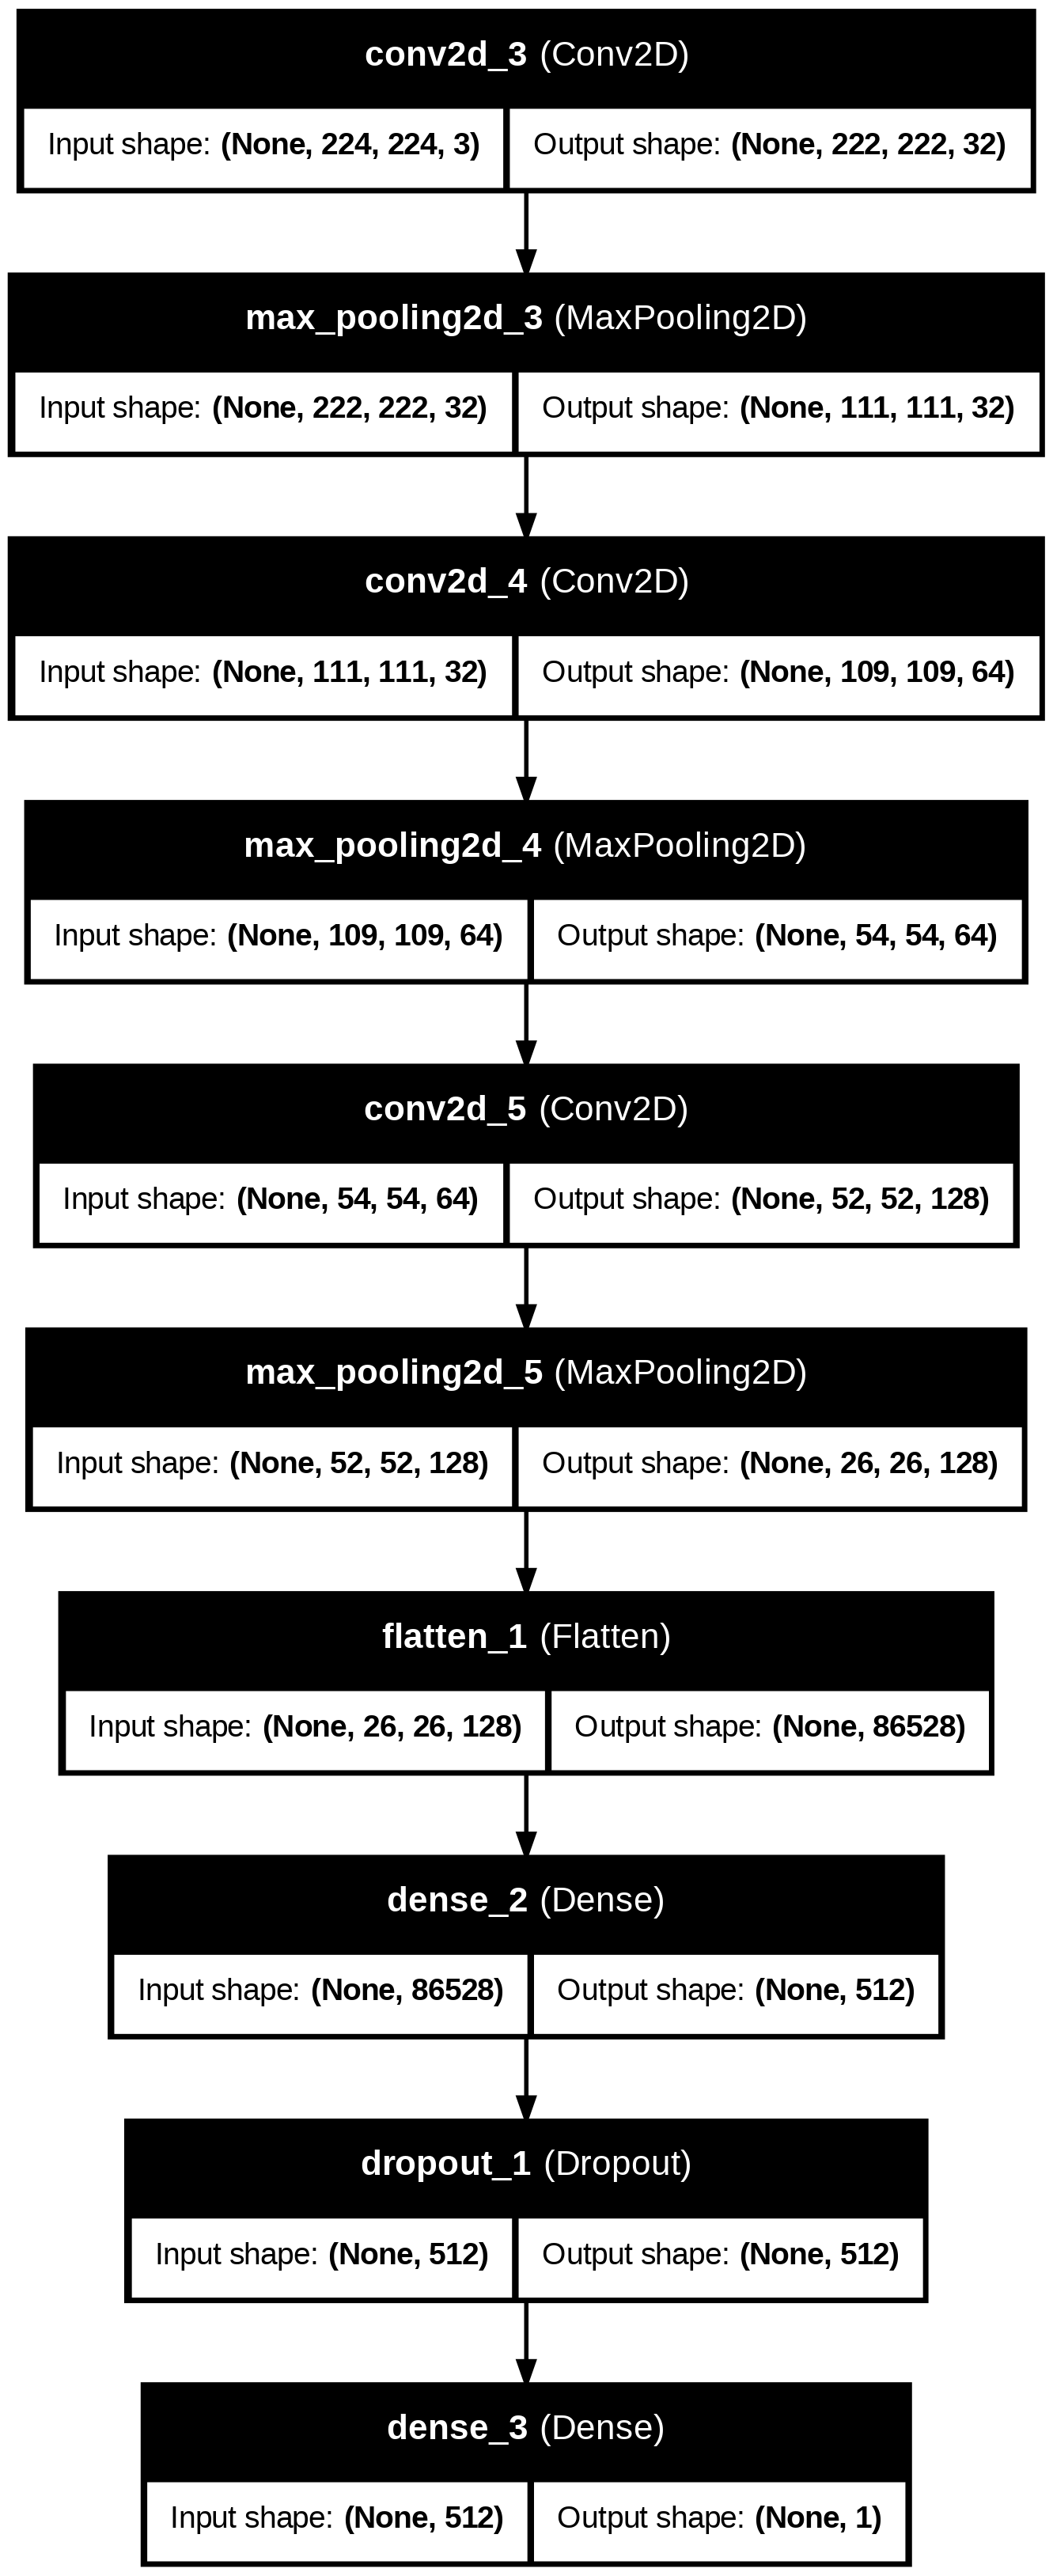

In [ ]:
# Generate and save the model architecture diagram
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
